In [2]:
import os 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import h5py
import numpy as np
import glob
matplotlib.rcParams['figure.figsize'] = [15, 15]
pd.options.mode.chained_assignment = None

In [3]:
spa_df = pd.read_csv( "/home/mathiane/LNENWork/LNEN_Molecular_groups_barlow_twin/script_analysis/LeidenCommunitySpatialPCA_50K_v4_164Clst_164Clst.csv")


In [4]:
spa_df.head()

,Unnamed: 0,img_id_c,axis_1,axis_2,axis_3,axis_4,axis_5,axis_6,axis_7,axis_8,...,axis_15,axis_16,axis_17,axis_18,axis_19,axis_20,tne_id_c,x,y,cluster
0,1,TNE0001_8065_37633,-0.257494,-1.627666,0.195665,-0.782960,0.609602,-0.514452,0.045713,0.038558,...,0.188700,-0.024188,0.084477,0.079461,0.120104,-0.021647,TNE0001,8065,37633,5
1,2,TNE0001_22657_31489,-0.877737,-0.375848,-0.299189,-0.270330,0.732014,-0.032159,0.169711,-0.622033,...,0.237997,0.032265,0.040977,-0.099032,0.138027,0.166180,TNE0001,22657,31489,8
2,3,TNE0001_13825_46081,-0.941830,0.159910,-0.331197,-0.065460,0.338028,-0.457056,-0.026327,0.153446,...,0.368674,0.072653,0.010810,-0.069452,-0.265456,0.175126,TNE0001,13825,46081,16
3,4,TNE0001_33409_26113,-0.662444,-0.879952,0.100236,-1.057138,0.173466,0.146886,0.177027,-0.332331,...,0.272544,-0.287586,-0.191274,0.033321,0.149279,0.333839,TNE0001,33409,26113,5
4,5,TNE0001_26497_44161,-0.368111,-0.068193,0.280432,-0.501225,0.221790,-1.009858,-0.264615,0.512844,...,0.402565,-0.064208,0.243526,-0.355801,-0.037688,0.453505,TNE0001,26497,44161,16


In [5]:
spa_df.shape

(4126673, 26)

In [6]:
Segmentation_TNEID = ["TNE0006", "TNE0007", "TNE0011", 
                      "TNE0056", "TNE0058",
                       "TNE0060", "TNE0061",  "TNE0071",
                      "TNE0073", "TNE0078",  "TNE0079",  
                      "TNE0080" ,  "TNE0081",
                      "TNE0227",  "TNE0233",
                      "TNE0983",  "TNE1003", "TNE1008", 
                      "TNE1407", "TNE1423", "TNE1430"]

In [7]:
set(Segmentation_TNEID ).difference(set(spa_df["tne_id_c"]))

set()

In [8]:
len(set(spa_df["tne_id_c"]).intersection(set(Segmentation_TNEID)))

21

In [9]:
spa_df_select = spa_df#[spa_df["tne_id_c"].isin(Segmentation_TNEID)]

In [10]:
spa_df_select.shape

(4126673, 26)

In [11]:
root_seg_dir = "/home/mathiane/LNENWork/CFlow_mathiane/CFlow/TumorSegmentation_HES_Baseline/segmentation_maps"
seg_df = pd.DataFrame()
for tneid in os.listdir(root_seg_dir):
    if (tneid[:2] == "1_" or tneid[:2] == "U_") and tneid.find("TNE") != -1:
        for ele in os.listdir(os.path.join(root_seg_dir,tneid)):
            if ele.find(".csv") != -1:
                df_seg_c = pd.read_csv(os.path.join(root_seg_dir,tneid, ele))
                df_seg_c = df_seg_c.rename(columns={"Path2Image": "file_path"})
                seg_df = pd.concat([seg_df, df_seg_c])
                #print(os.path.join(root_seg_dir,tneid, ele))
                #print(df_seg_c.iloc[0,1], "\n")
    else:
        pass
    # if tneid[2:9] in Segmentation_TNEID:
   

In [12]:
seg_df.shape

(5346013, 3)

In [13]:
seg_df.head()

,Unnamed: 0,file_path,PredTumorNomal
0,0,/gpfsscratch/rech/ohv/ueu39kt/Tiles_HE_all_sam...,Tumor
1,1,/gpfsscratch/rech/ohv/ueu39kt/Tiles_HE_all_sam...,Normal
2,2,/gpfsscratch/rech/ohv/ueu39kt/Tiles_HE_all_sam...,Tumor
3,3,/gpfsscratch/rech/ohv/ueu39kt/Tiles_HE_all_sam...,Tumor
4,4,/gpfsscratch/rech/ohv/ueu39kt/Tiles_HE_all_sam...,Normal


In [14]:
sum(seg_df.duplicated(subset=["file_path"]))

0

In [15]:
seg_df.iloc[0,1].split("/")[-1].split("_")[2].split(".")[0]

'31873'

In [16]:
def get_img_id_c(seg_df):
    img_id_c = []
    for i in range(seg_df.shape[0]):
        path_c = seg_df.iloc[i,1]
        tne_id_c = seg_df.iloc[i,1].split("/")[-1][:7]
        x = seg_df.iloc[i,1].split("/")[-1].split("_")[1]
        y = seg_df.iloc[i,1].split("/")[-1].split("_")[2].split(".")[0]
        img_id_current =  tne_id_c + "_" + x + "_" + y
        img_id_c.append(img_id_current)
    return img_id_c
img_id_l = get_img_id_c(seg_df)

In [17]:
print(len(img_id_l) , len(set(img_id_l)))

5346013 5298093


In [18]:
seg_df["img_id_c"] = img_id_l

In [19]:
seg_df.head()

,Unnamed: 0,file_path,PredTumorNomal,img_id_c
0,0,/gpfsscratch/rech/ohv/ueu39kt/Tiles_HE_all_sam...,Tumor,TNE1425_92929_31873
1,1,/gpfsscratch/rech/ohv/ueu39kt/Tiles_HE_all_sam...,Normal,TNE1425_49537_41857
2,2,/gpfsscratch/rech/ohv/ueu39kt/Tiles_HE_all_sam...,Tumor,TNE1425_86785_27649
3,3,/gpfsscratch/rech/ohv/ueu39kt/Tiles_HE_all_sam...,Tumor,TNE1425_89857_59521
4,4,/gpfsscratch/rech/ohv/ueu39kt/Tiles_HE_all_sam...,Normal,TNE1425_82177_36865


In [20]:
seg_df["Duplicated"] =  seg_df.duplicated(subset=["img_id_c"])

In [21]:
seg_df[seg_df["Duplicated"] == True]

,Unnamed: 0,file_path,PredTumorNomal,img_id_c,Duplicated
495,495,/gpfsscratch/rech/ohv/ueu39kt/Tiles_HE_all_sam...,Tumor,TNE1364_43009_37633,True
503,503,/gpfsscratch/rech/ohv/ueu39kt/Tiles_HE_all_sam...,Tumor,TNE1364_74497_52993,True
540,540,/gpfsscratch/rech/ohv/ueu39kt/Tiles_HE_all_sam...,Tumor,TNE1364_35329_11137,True
551,551,/gpfsscratch/rech/ohv/ueu39kt/Tiles_HE_all_sam...,Tumor,TNE1364_63745_29185,True
622,622,/gpfsscratch/rech/ohv/ueu39kt/Tiles_HE_all_sam...,Tumor,TNE1364_65665_18817,True
...,...,...,...,...,...
38637,38637,/gpfsscratch/rech/ohv/ueu39kt/Tiles_HE_all_sam...,Normal,TNE1344_28417_18433,True
38638,38638,/gpfsscratch/rech/ohv/ueu39kt/Tiles_HE_all_sam...,Normal,TNE1344_66433_12289,True
38639,38639,/gpfsscratch/rech/ohv/ueu39kt/Tiles_HE_all_sam...,Tumor,TNE1344_43009_48769,True
38640,38640,/gpfsscratch/rech/ohv/ueu39kt/Tiles_HE_all_sam...,Normal,TNE1344_81409_18433,True


In [22]:
seg_df = seg_df[seg_df["Duplicated"] != True]

In [23]:
seg_df = seg_df.drop(['Unnamed: 0',"Duplicated"], axis=1)

In [24]:
spa_df_select_seg  =pd.concat([seg_df.set_index('img_id_c'), spa_df_select.set_index('img_id_c')], axis=1, join='inner').reset_index()

In [25]:
spa_df_select_seg.shape

(4070850, 28)

In [26]:
spa_df_select.shape

(4126673, 26)

In [30]:
set(seg_df["img_id_c"]).difference(set(spa_df_select_seg["img_id_c"]))

{'TNE0524_92161_64513',
 'TNE0278_14209_42625',
 'TNE0591_29953_22273',
 'TNE2127_46465_68353',
 'TNE0810_42625_53377',
 'TNE233__71809_41089',
 'TNE1403_39937_31873',
 'TNE0500_28801_16129',
 'TNE2142_50305_9601',
 'TNE1002_59905_13057',
 'TNE1008_36097_13825',
 'TNE2127_70273_39553',
 'TNE2150_65281_63361',
 'TNE0067_30721_43777',
 'TNE1450_61441_73345',
 'TNE2150_46849_35713',
 'TNE0519_101761_16129',
 'TNE1101_75265_56833',
 'TNE1101_106753_51457',
 'TNE0387_35137_22657',
 'TNE1450_16513_74881',
 'TNE0805_48385_19201',
 'TNE1101_40705_13825',
 'TNE0287_61057_66817',
 'TNE0066_71809_68737',
 'TNE0408_48385_27649',
 'TNE0221_48385_8449',
 'TNE0500_52225_45313',
 'TNE0342_54145_70657',
 'TNE0067_18433_28801',
 'TNE1002_43009_29953',
 'TNE0342_19201_58753',
 'TNE0479_38017_56449',
 'TNE0547_74881_36865',
 'TNE2105_38785_37633',
 'TNE0591_19201_52609',
 'TNE0479_100993_35329',
 'TNE1444_40321_30337',
 'TNE0519_37249_55297',
 'TNE1403_78721_50689',
 'TNE1403_12673_33025',
 'TNE0287_13441

In [31]:
spa_df_select_seg.describe()

,Unnamed: 0,axis_1,axis_2,axis_3,axis_4,axis_5,axis_6,axis_7,axis_8,axis_9,...,axis_14,axis_15,axis_16,axis_17,axis_18,axis_19,axis_20,x,y,cluster
count,4.070850e+06,4.070850e+06,4.070850e+06,4.070850e+06,4.070850e+06,4.070850e+06,4.070850e+06,4.070850e+06,4.070850e+06,4.070850e+06,...,4.070850e+06,4.070850e+06,4.070850e+06,4.070850e+06,4.070850e+06,4.070850e+06,4.070850e+06,4.070850e+06,4.070850e+06,4.070850e+06
mean,2.066610e+06,-6.199590e-01,-1.912746e-01,-8.649380e-02,-7.569259e-01,1.460578e-01,-1.162921e-01,3.570913e-02,-1.285695e-01,-3.269546e-02,...,1.302509e-01,8.107028e-02,-9.258602e-02,7.276811e-03,2.954491e-02,5.540251e-02,1.341717e-01,5.205261e+04,3.962643e+04,1.661530e+01
std,1.195010e+06,1.133075e+00,1.029619e+00,7.264899e-01,7.323279e-01,7.542107e-01,6.008838e-01,5.116402e-01,5.095625e-01,4.920855e-01,...,3.286075e-01,3.289931e-01,3.599432e-01,3.024133e-01,3.029621e-01,2.659613e-01,2.785945e-01,2.568575e+04,1.887562e+04,1.822303e+01
min,1.000000e+00,-1.728732e+02,-9.917312e+01,-1.285110e+02,-7.090626e+01,-1.162195e+02,-4.897738e+01,-6.943591e+01,-6.119256e+01,-6.944803e+01,...,-3.590372e+01,-3.917871e+01,-6.851697e+01,-3.734881e+01,-4.647945e+01,-5.099007e+01,-6.185357e+01,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.035403e+06,-1.374452e+00,-8.051436e-01,-5.105376e-01,-1.174292e+00,-3.030110e-01,-4.643509e-01,-2.514364e-01,-4.235482e-01,-2.974269e-01,...,-6.175886e-02,-9.524767e-02,-2.892935e-01,-1.575867e-01,-1.368540e-01,-8.986991e-02,-1.310005e-02,3.148900e+04,2.496100e+04,5.000000e+00
50%,2.055442e+06,-7.497810e-01,-1.322924e-01,-8.401592e-02,-7.244353e-01,1.683595e-01,-1.050837e-01,2.615494e-02,-1.201511e-01,-3.303520e-02,...,1.196804e-01,9.098441e-02,-9.241695e-02,1.556282e-02,2.757548e-02,5.503946e-02,1.415646e-01,5.030500e+04,3.840100e+04,9.000000e+00
75%,3.104394e+06,1.178996e-02,4.886839e-01,3.459124e-01,-3.126783e-01,6.047043e-01,2.596805e-01,3.083184e-01,1.756094e-01,2.335059e-01,...,3.119270e-01,2.629316e-01,1.037692e-01,1.798012e-01,1.988419e-01,1.964826e-01,2.872396e-01,7.065700e+04,5.337700e+04,2.100000e+01
max,4.126673e+06,1.159697e+02,1.544609e+02,1.318858e+02,6.385573e+01,9.274061e+01,8.628941e+01,5.663471e+01,6.668375e+01,7.706609e+01,...,4.678339e+01,7.295803e+01,6.356781e+01,5.141071e+01,3.966282e+01,4.426460e+01,5.271757e+01,1.562890e+05,9.600100e+04,1.610000e+02


In [32]:
spa_df_select_seg['PredTumorNomal'] = spa_df_select_seg['PredTumorNomal'].astype('category')

[(-5.0, 5.0), (-5.0, 5.0)]

/home/mathiane/miniconda3/envs/HaloAE/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


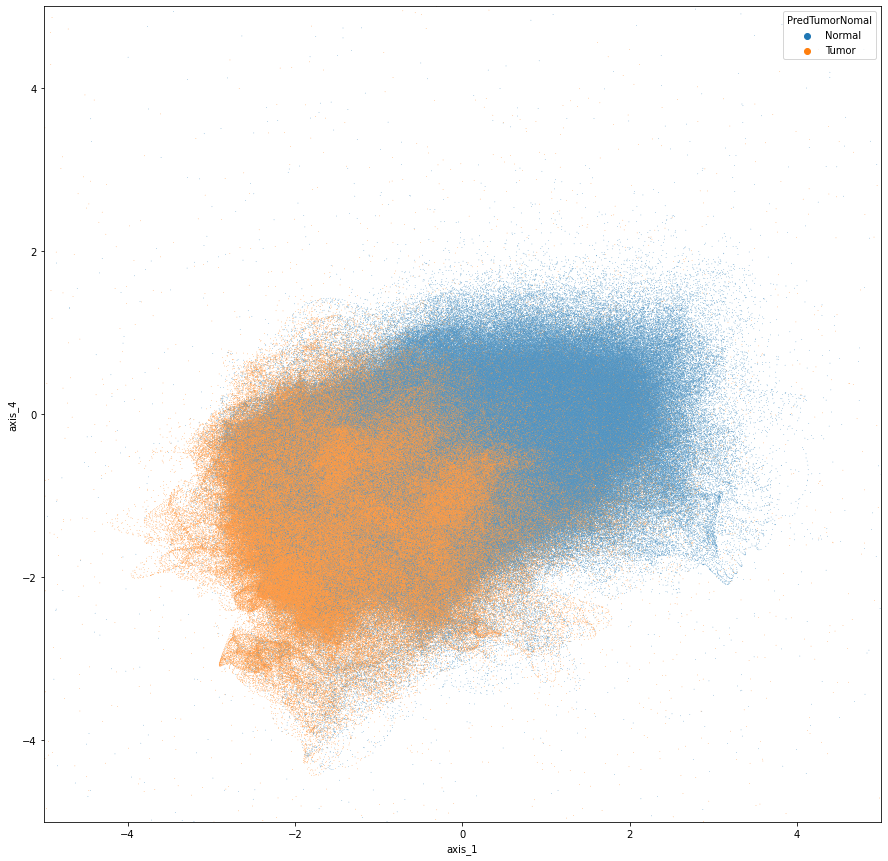

In [91]:
g = sns.scatterplot(data = spa_df_select_seg, x="axis_1", y="axis_4", hue="PredTumorNomal", s=0.4)
g.set(ylim=(-5, 5), xlim=(-5,5))

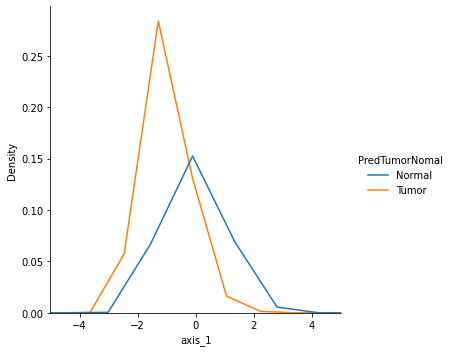

In [86]:
g = sns.displot(data = spa_df_select_seg, x="axis_1", hue="PredTumorNomal", kind="kde", fill=True)
g.set(xlim=(-5,5))

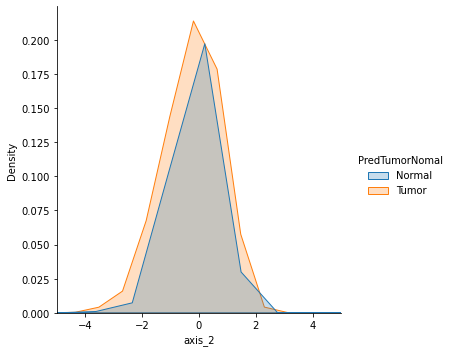

In [88]:
g = sns.displot(data = spa_df_select_seg, x="axis_2", hue="PredTumorNomal", kind="kde", fill=True)
g.set(xlim=(-5,5))

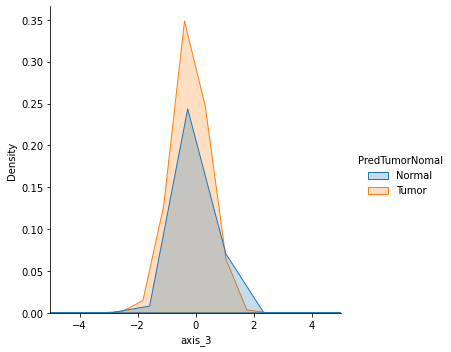

In [89]:
g = sns.displot(data = spa_df_select_seg, x="axis_3", hue="PredTumorNomal", kind="kde", fill=True)
g.set(xlim=(-5,5))

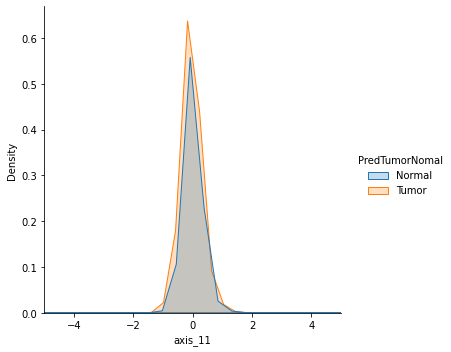

In [98]:
g = sns.displot(data = spa_df_select_seg, x="axis_11", hue="PredTumorNomal", kind="kde", fill=True)
g.set(xlim=(-5,5))

In [36]:
BT_all_proj = pd.read_csv("/home/mathiane/LNENWork/LNEN_Molecular_groups_barlow_twin/projector/barlow_twins_encoded_vectors_scale_path_review.csv")

In [83]:
BT_all_proj.head()\
    

,Unnamed: 0,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,X124,X125,X126,X127,img_id,tne_id,img_id_c,tne_id_c,x,y
0,1,0.010731,-0.017492,-0.053791,0.006058,-0.040010,0.006106,-0.024915,-0.011729,0.007921,...,0.002239,0.007743,0.008007,-0.016012,TNE1019_30721_19585,TNE1019,TNE1019_30721_19585,TNE1019,30721.0,19585
1,2,0.003174,-0.002447,-0.040421,0.000079,-0.030701,0.005880,-0.027878,-0.006616,0.011590,...,-0.013962,0.007799,0.012292,0.005784,TNE1019_33409_28801,TNE1019,TNE1019_33409_28801,TNE1019,33409.0,28801
2,3,-0.010324,-0.008172,-0.039857,-0.003609,-0.023241,-0.007832,-0.032735,-0.020779,0.005676,...,-0.001943,0.003459,0.009208,0.010942,TNE1019_45313_14209,TNE1019,TNE1019_45313_14209,TNE1019,45313.0,14209
3,4,0.011308,-0.018657,-0.060345,0.015401,-0.023393,-0.007311,-0.022321,-0.004438,0.009153,...,0.011426,0.008252,0.012065,-0.010705,TNE1019_9985_23809,TNE1019,TNE1019_9985_23809,TNE1019,9985.0,23809
4,5,-0.000423,-0.025801,-0.052976,0.005961,-0.026089,-0.010742,-0.021492,-0.003688,0.008236,...,-0.000672,0.009480,0.010750,-0.007972,TNE1019_15361_11905,TNE1019,TNE1019_15361_11905,TNE1019,15361.0,11905


In [38]:
spa_df_select_seg_s = spa_df_select_seg[["img_id_c", "PredTumorNomal"]]

In [42]:
BT_all_proj_TumorNormal = BT_all_proj.merge(spa_df_select_seg_s, on ="img_id_c", how = "inner")

In [40]:
BT_all_proj_TumorNormal = pd.concat([BT_all_proj.set_index("img_id_c"), spa_df_select_seg_s.set_index('img_id_c')], axis=1, join='inner')#.reset_index()

ValueError: Shape of passed values is (4317636, 135), indices imply (4070850, 135)

In [43]:
BT_all_proj_TumorNormal.shape

(4317636, 136)

In [86]:
spa_df_select_seg_s.shape

(316005, 2)

In [44]:
sum(BT_all_proj_TumorNormal.duplicated("img_id_c"))

246786

In [45]:
## Create h5 files to train Roformer MIL

In [58]:
def save_hdf5(output_path, asset_dict, attr_dict=None, mode="a"):
    file = h5py.File(output_path, mode)
    for key, val in asset_dict.items():
        data_shape = val.shape
        if key not in file:
            data_type = val.dtype
            chunk_shape = (1,) + data_shape[1:]
            maxshape = (None,) + data_shape[1:]
            dset = file.create_dataset(
                key,
                shape=data_shape,
                maxshape=maxshape,
                chunks=chunk_shape,
                dtype=data_type,
            )
            dset[:] = val
            if attr_dict is not None:
                if key in attr_dict.keys():
                    for attr_key, attr_val in attr_dict[key].items():
                        dset.attrs[attr_key] = attr_val
        else:
            dset = file[key]
            dset.resize(len(dset) + data_shape[0], axis=0)
            dset[-data_shape[0] :] = val
    file.close()
    return output_path

In [78]:
root_data = "/home/mathiane/LNENWork/data_RoFormerMIL_TumorSegExp"
for tneid in set(BT_all_proj_TumorNormal["tne_id_c"]):
    print("Tneid = ", tneid)
    BT_all_proj_TumorNormal_c = BT_all_proj_TumorNormal[BT_all_proj_TumorNormal["tne_id_c"] == tneid]
    #Tumor
    BT_all_proj_TumorNormal_tumor = BT_all_proj_TumorNormal_c[BT_all_proj_TumorNormal_c["PredTumorNomal"] ==  'Tumor']
    print("Nb tumor tiles = ", BT_all_proj_TumorNormal_tumor.shape[0])
    BT_all_proj_TumorNormal_tumor = BT_all_proj_TumorNormal_tumor.sort_values(by=["x","y"])
    BT_all_proj_TumorNormal_tumor["x_rank"] = BT_all_proj_TumorNormal_tumor["x"].rank(method="min")-1
    BT_all_proj_TumorNormal_tumor["y_rank"] = BT_all_proj_TumorNormal_tumor["y"].rank(method="min")-1
    BT_all_proj_TumorNormal_tumor["x_rank"] = BT_all_proj_TumorNormal_tumor["x_rank"].astype(int)
    BT_all_proj_TumorNormal_tumor["y_rank"] = BT_all_proj_TumorNormal_tumor["y_rank"].astype(int)
    
    BT_all_proj_TumorNormal_features_tumor =  BT_all_proj_TumorNormal_tumor.iloc[:,1:(1+128)]
    
    BT_all_proj_TumorNormal_coords_tumor = BT_all_proj_TumorNormal_tumor[["img_id_c", "x","y", "x_rank", "y_rank"]]
    BT_all_proj_TumorNormal_coords_tumor_for_export = BT_all_proj_TumorNormal_coords_tumor[["x_rank", "y_rank"]]
    
    asset_dict_tumor = {   
        "coords": BT_all_proj_TumorNormal_coords_tumor_for_export.to_numpy(),
        "features": BT_all_proj_TumorNormal_features_tumor.to_numpy(dtype='float32'),
            }
    h5_file_tumor = os.path.join(root_data, "features_h5_files", "Tumor", tneid + "_T.h5" )
    save_hdf5(h5_file_tumor, asset_dict_tumor, attr_dict=None, mode = "w")
    
    coords_tumor_filename = os.path.join(root_data, "coords_table", "Tumor", tneid + "_T_coords.csv" )
    BT_all_proj_TumorNormal_coords_tumor.to_csv(coords_tumor_filename, index=False )
    
    #Non Tumor
    BT_all_proj_TumorNormal_NONtumor = BT_all_proj_TumorNormal_c[BT_all_proj_TumorNormal_c["PredTumorNomal"] !=  'Tumor']
    # print("BT_all_proj_TumorNormal_features_tumor ", BT_all_proj_TumorNormal_features_tumor.shape)
    # print("BT_all_proj_TumorNormal_coords_tumor_for_export ", BT_all_proj_TumorNormal_coords_tumor_for_export.shape)
    # print("BT_all_proj_TumorNormal_coords_tumor ", BT_all_proj_TumorNormal_coords_tumor.shape)
    print("\n Nb Non tumor tiles = ", BT_all_proj_TumorNormal_NONtumor.shape[0])

    BT_all_proj_TumorNormal_NONtumor = BT_all_proj_TumorNormal_NONtumor.sort_values(by=["x","y"])
    BT_all_proj_TumorNormal_NONtumor["x_rank"] = BT_all_proj_TumorNormal_NONtumor["x"].rank(method="min")-1
    BT_all_proj_TumorNormal_NONtumor["y_rank"] = BT_all_proj_TumorNormal_NONtumor["y"].rank(method="min")-1
    BT_all_proj_TumorNormal_NONtumor["x_rank"] = BT_all_proj_TumorNormal_NONtumor["x_rank"].astype(int)
    BT_all_proj_TumorNormal_NONtumor["y_rank"] = BT_all_proj_TumorNormal_NONtumor["y_rank"].astype(int)
    
    BT_all_proj_TumorNormal_features_NONtumor =  BT_all_proj_TumorNormal_NONtumor.iloc[:,1:(1+128)]
    
    BT_all_proj_TumorNormal_coords_NONtumor = BT_all_proj_TumorNormal_NONtumor[["img_id_c", "x","y", "x_rank", "y_rank"]]
    BT_all_proj_TumorNormal_coords_NONtumor_for_export = BT_all_proj_TumorNormal_coords_NONtumor[["x_rank", "y_rank"]]

    asset_dict_NONtumor = {   
        "coords": BT_all_proj_TumorNormal_coords_NONtumor_for_export.to_numpy(),
        "features": BT_all_proj_TumorNormal_features_NONtumor.to_numpy(dtype='float32'),
            }
    h5_file_NONtumor = os.path.join(root_data, "features_h5_files", "NonTumor", tneid + "_N.h5" )
    save_hdf5(h5_file_NONtumor, asset_dict_NONtumor, attr_dict=None, mode = "w")
    
    coords_NONtumor_filename = os.path.join(root_data, "coords_table", "NonTumor", tneid + "_N_coords.csv" )
    BT_all_proj_TumorNormal_coords_NONtumor.to_csv(coords_NONtumor_filename, index=False )

    # print("BT_all_proj_TumorNormal_features_NONtumor ", BT_all_proj_TumorNormal_features_NONtumor.shape)
    # print("BT_all_proj_TumorNormal_coords_NONtumor_for_export ", BT_all_proj_TumorNormal_coords_NONtumor_for_export.shape)
    # print("BT_all_proj_TumorNormal_coords_NONtumor ", BT_all_proj_TumorNormal_coords_NONtumor.shape)
    print("___________________________________________________ \n")


Tneid =  TNE1412
Nb tumor tiles =  5896

 Nb Non tumor tiles =  5440
___________________________________________________ 

Tneid =  TNE1426
Nb tumor tiles =  11107

 Nb Non tumor tiles =  7576
___________________________________________________ 

Tneid =  TNE1424
Nb tumor tiles =  1795

 Nb Non tumor tiles =  2401
___________________________________________________ 

Tneid =  TNE1414
Nb tumor tiles =  3674

 Nb Non tumor tiles =  3099
___________________________________________________ 

Tneid =  TNE0993
Nb tumor tiles =  2539

 Nb Non tumor tiles =  5762
___________________________________________________ 

Tneid =  TNE0406
Nb tumor tiles =  10051

 Nb Non tumor tiles =  4641
___________________________________________________ 

Tneid =  TNE0071
Nb tumor tiles =  4074

 Nb Non tumor tiles =  10009
___________________________________________________ 

Tneid =  TNE0873
Nb tumor tiles =  11454

 Nb Non tumor tiles =  8999
___________________________________________________ 

Tneid =  TNE

In [79]:
# Create slides_format slides
case_id = []
slide_id = []
label_id = []
label = []
for ele in os.listdir(os.path.join(root_data, "features_h5_files", "Tumor")):
    if ele.find("h5") != -1:
        case_id.append(ele.split(".")[0])
        slide_id.append(ele.split(".")[0])
        label_id.append("Tumor")
        label.append("Tumor")
for ele in os.listdir(os.path.join(root_data, "features_h5_files", "NonTumor")):
    if ele.find("h5") != -1:
        case_id.append(ele.split(".")[0])
        slide_id.append(ele.split(".")[0])
        label_id.append("NonTumor")
        label.append("NonTumor")
slides_format = pd.DataFrame({"case_id":case_id,
                              "slide_id": slide_id,
                              "label_id": label_id,
                              "label": label})


In [80]:
slides_format.head()

,case_id,slide_id,label_id,label
0,TNE0008_T,TNE0008_T,Tumor,Tumor
1,TNE0060_T,TNE0060_T,Tumor,Tumor
2,TNE1026_T,TNE1026_T,Tumor,Tumor
3,TNE0081_T,TNE0081_T,Tumor,Tumor
4,TNE0541_T,TNE0541_T,Tumor,Tumor


In [81]:
slides_format.shape

(508, 4)

In [82]:
slides_format.to_csv( os.path.join(root_data, "dataRoFormer", "slides_format.csv"))

In [99]:
## File list for new inference with BT 
BT_all_proj_TumorNormal.head()

,Unnamed: 0,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,X125,X126,X127,img_id,tne_id,img_id_c,tne_id_c,x,y,PredTumorNomal
0,1,0.010731,-0.017492,-0.053791,0.006058,-0.040010,0.006106,-0.024915,-0.011729,0.007921,...,0.007743,0.008007,-0.016012,TNE1019_30721_19585,TNE1019,TNE1019_30721_19585,TNE1019,30721.0,19585,Normal
1,2,0.003174,-0.002447,-0.040421,0.000079,-0.030701,0.005880,-0.027878,-0.006616,0.011590,...,0.007799,0.012292,0.005784,TNE1019_33409_28801,TNE1019,TNE1019_33409_28801,TNE1019,33409.0,28801,Tumor
2,3,-0.010324,-0.008172,-0.039857,-0.003609,-0.023241,-0.007832,-0.032735,-0.020779,0.005676,...,0.003459,0.009208,0.010942,TNE1019_45313_14209,TNE1019,TNE1019_45313_14209,TNE1019,45313.0,14209,Normal
3,4,0.011308,-0.018657,-0.060345,0.015401,-0.023393,-0.007311,-0.022321,-0.004438,0.009153,...,0.008252,0.012065,-0.010705,TNE1019_9985_23809,TNE1019,TNE1019_9985_23809,TNE1019,9985.0,23809,Normal
4,5,-0.000423,-0.025801,-0.052976,0.005961,-0.026089,-0.010742,-0.021492,-0.003688,0.008236,...,0.009480,0.010750,-0.007972,TNE1019_15361_11905,TNE1019,TNE1019_15361_11905,TNE1019,15361.0,11905,Tumor


In [111]:
import random
BT_all_proj_TumorNormal_r =BT_all_proj_TumorNormal[BT_all_proj_TumorNormal["tne_id_c"].isin(random.sample(set(BT_all_proj_TumorNormal["tne_id_c"]), 30))]#.shape

In [118]:
root_tiles = "/home/mathiane/LNENWork/Tiles_HE_all_samples_384_384_Vahadane_2"
root_data = "/home/mathiane/LNENWork/data_RoFormerMIL_TumorSegExp"
os.makedirs(f"{root_data}/NewProjBT1024_FilesLists", exist_ok=True)
for tneid in list(set(BT_all_proj_TumorNormal_r["tne_id"])):
    for folder in os.listdir(root_tiles):
        df_c = pd.DataFrame({"FileList": glob.glob(f"{root_tiles}/{tneid}/accept/*.jpg")})
        df_c.to_csv(f"{root_data}/NewProjBT1024_FilesLists/fileslist_{tneid}.csv", index=False, header=False)


In [120]:
np.load("/home/mathiane/LNENWork/data_RoFormerMIL_TumorSegExp/LargeProjBT/TNE1423/TNE1423_33025_43009.npy").shape

(2048,)

In [31]:
## Create data base with wide projections
### 1) Get projector vectors
root = "/home/mathiane/LNENWork/data_RoFormerMIL_TumorSegExp/LargeProjBT"
BT_projections = pd.DataFrame()
for ele in os.listdir(root):
    if ele.find(".csv")!=-1:
        print(os.path.join(root, ele))
        df_c = pd.read_csv(os.path.join(root, ele))
        BT_projections = pd.concat([BT_projections, df_c])

/home/mathiane/LNENWork/data_RoFormerMIL_TumorSegExp/LargeProjBT/barlowTwins_largeproj_TNE0892.csv
/home/mathiane/LNENWork/data_RoFormerMIL_TumorSegExp/LargeProjBT/barlowTwins_largeproj_TNE0862.csv
/home/mathiane/LNENWork/data_RoFormerMIL_TumorSegExp/LargeProjBT/barlowTwins_largeproj_TNE1097.csv
/home/mathiane/LNENWork/data_RoFormerMIL_TumorSegExp/LargeProjBT/barlowTwins_largeproj_TNE0006.csv
/home/mathiane/LNENWork/data_RoFormerMIL_TumorSegExp/LargeProjBT/barlowTwins_largeproj_TNE1365.csv
/home/mathiane/LNENWork/data_RoFormerMIL_TumorSegExp/LargeProjBT/barlowTwins_largeproj_TNE0975.csv
/home/mathiane/LNENWork/data_RoFormerMIL_TumorSegExp/LargeProjBT/barlowTwins_largeproj_TNE1909.csv
/home/mathiane/LNENWork/data_RoFormerMIL_TumorSegExp/LargeProjBT/barlowTwins_largeproj_TNE1080.csv
/home/mathiane/LNENWork/data_RoFormerMIL_TumorSegExp/LargeProjBT/barlowTwins_largeproj_TNE1423.csv
/home/mathiane/LNENWork/data_RoFormerMIL_TumorSegExp/LargeProjBT/barlowTwins_largeproj_TNE1508.csv
/home/math

In [32]:
BT_projections.head()

,0,1,2,3,4,5,6,7,8,9,...,2040,2041,2042,2043,2044,2045,2046,2047,img_id,tne_id
0,0.406754,0.708813,0.347085,0.337632,0.288300,0.354011,0.081847,0.190264,0.200195,0.341575,...,0.059331,0.364094,0.116174,0.452131,1.111150,0.692373,0.169693,0.445881,TNE0892_67969_20353,TNE0892
1,0.460747,0.968863,0.388979,0.094287,0.245103,0.370913,0.470093,0.169922,0.340255,0.201184,...,0.219395,0.083729,0.175284,0.370988,0.429874,0.597987,0.172036,0.060018,TNE0892_66049_32257,TNE0892
2,0.481980,0.808464,0.336232,0.181312,0.240481,0.394667,0.173331,0.033027,0.372429,0.370283,...,0.303228,0.389070,0.169798,0.281395,0.759449,0.409350,0.183210,0.169302,TNE0892_27265_27649,TNE0892
3,0.573368,0.520849,0.239950,0.289377,0.376141,0.317370,0.153263,0.286553,0.257670,0.389349,...,0.198229,0.225317,0.114906,0.423513,1.331538,0.636999,0.161028,0.264890,TNE0892_79873_19585,TNE0892
4,0.428419,0.654749,0.373178,0.116723,0.430558,0.275865,0.259891,0.161654,0.297196,0.383175,...,0.068054,0.124196,0.145397,0.401487,0.900387,0.440590,0.132716,0.236480,TNE0892_72577_23041,TNE0892


In [ ]:
spa_df_select_seg  =pd.concat([seg_df.set_index('img_id_c'), spa_df_select.set_index('img_id_c')], axis=1, join='inner').reset_index()

In [33]:
spa_df_select_seg.head()

,img_id_c,file_path,PredTumorNomal,Unnamed: 0,axis_1,axis_2,axis_3,axis_4,axis_5,axis_6,...,axis_15,axis_16,axis_17,axis_18,axis_19,axis_20,tne_id_c,x,y,cluster
0,TNE1425_92929_31873,/gpfsscratch/rech/ohv/ueu39kt/Tiles_HE_all_sam...,Tumor,3434343,-0.605154,-0.837244,0.256532,-0.373257,0.423736,-0.607522,...,0.448890,-0.269719,0.136830,0.379724,0.099160,0.004828,TNE1425,92929,31873,89
1,TNE1425_49537_41857,/gpfsscratch/rech/ohv/ueu39kt/Tiles_HE_all_sam...,Normal,3446751,-0.907228,-1.389304,0.059787,-0.476668,0.936044,0.610854,...,0.020801,-0.123768,0.190386,0.364117,0.293155,0.009666,TNE1425,49537,41857,4
2,TNE1425_86785_27649,/gpfsscratch/rech/ohv/ueu39kt/Tiles_HE_all_sam...,Tumor,3437845,-1.152216,-1.676343,-0.110719,-0.749534,0.378574,-0.624811,...,0.154262,-0.320086,0.095519,0.300819,0.155728,0.069823,TNE1425,86785,27649,4
3,TNE1425_89857_59521,/gpfsscratch/rech/ohv/ueu39kt/Tiles_HE_all_sam...,Tumor,3431970,-1.254112,-1.953419,-1.107576,0.331035,0.536363,0.425052,...,-0.034732,-0.188596,-0.273838,0.408929,0.105414,0.460362,TNE1425,89857,59521,4
4,TNE1425_82177_36865,/gpfsscratch/rech/ohv/ueu39kt/Tiles_HE_all_sam...,Normal,3444524,-1.012972,0.432279,0.230115,-0.333923,0.668656,-0.453010,...,0.236140,-0.347851,0.248964,0.118415,0.219886,0.321942,TNE1425,82177,36865,8


In [34]:
BT_projections.shape

(471360, 2050)

In [35]:
spa_df_select_seg.shape

(4070850, 28)

In [48]:
spa_df_select_seg_s = spa_df_select_seg[["img_id_c", "PredTumorNomal", "x", "y"]]

In [49]:
BT_projections_Seg  =pd.concat([BT_projections.set_index('img_id'), spa_df_select_seg_s.set_index('img_id_c')], axis=1, join='inner').reset_index()

In [50]:
BT_projections_Seg.head()

,index,0,1,2,3,4,5,6,7,8,...,2042,2043,2044,2045,2046,2047,tne_id,PredTumorNomal,x,y
0,TNE0892_67969_20353,0.406754,0.708813,0.347085,0.337632,0.288300,0.354011,0.081847,0.190264,0.200195,...,0.116174,0.452131,1.111150,0.692373,0.169693,0.445881,TNE0892,Tumor,67969,20353
1,TNE0892_66049_32257,0.460747,0.968863,0.388979,0.094287,0.245103,0.370913,0.470093,0.169922,0.340255,...,0.175284,0.370988,0.429874,0.597987,0.172036,0.060018,TNE0892,Tumor,66049,32257
2,TNE0892_27265_27649,0.481980,0.808464,0.336232,0.181312,0.240481,0.394667,0.173331,0.033027,0.372429,...,0.169798,0.281395,0.759449,0.409350,0.183210,0.169302,TNE0892,Tumor,27265,27649
3,TNE0892_79873_19585,0.573368,0.520849,0.239950,0.289377,0.376141,0.317370,0.153263,0.286553,0.257670,...,0.114906,0.423513,1.331538,0.636999,0.161028,0.264890,TNE0892,Normal,79873,19585
4,TNE0892_72577_23041,0.428419,0.654749,0.373178,0.116723,0.430558,0.275865,0.259891,0.161654,0.297196,...,0.145397,0.401487,0.900387,0.440590,0.132716,0.236480,TNE0892,Tumor,72577,23041


In [51]:
BT_projections_Seg = BT_projections_Seg.rename(columns={"index":"img_id_c"})

In [52]:
set(BT_projections_Seg["tne_id"])

{'TNE0002',
 'TNE0006',
 'TNE0007',
 'TNE0009',
 'TNE0028',
 'TNE0233',
 'TNE0340',
 'TNE0807',
 'TNE0809',
 'TNE0859',
 'TNE0862',
 'TNE0863',
 'TNE0872',
 'TNE0875',
 'TNE0885',
 'TNE0890',
 'TNE0892',
 'TNE1365',
 'TNE1416',
 'TNE1421',
 'TNE1422',
 'TNE1423',
 'TNE1508'}

In [59]:
root_data = "/home/mathiane/LNENWork/data_RoFormerMIL_TumorSegExp"
os.makedirs(os.path.join(root_data, "features_h5_files_large_proj"), exist_ok=True)
os.makedirs(os.path.join(root_data, "features_h5_files_large_proj", "Tumor"), exist_ok=True)
os.makedirs(os.path.join(root_data, "features_h5_files_large_proj", "NonTumor"), exist_ok=True)
os.makedirs(os.path.join(root_data, "coords_table_large_proj", "Tumor"), exist_ok=True)
os.makedirs(os.path.join(root_data, "coords_table_large_proj", "NonTumor"), exist_ok=True)
for tneid in set(BT_projections_Seg["tne_id"]):
    print("Tneid = ", tneid)
    BT_all_proj_TumorNormal_c = BT_projections_Seg[BT_projections_Seg["tne_id"] == tneid]
    #Tumor
    BT_all_proj_TumorNormal_tumor = BT_all_proj_TumorNormal_c[BT_all_proj_TumorNormal_c["PredTumorNomal"] ==  'Tumor']
    print("Nb tumor tiles = ", BT_all_proj_TumorNormal_tumor.shape[0])
    BT_all_proj_TumorNormal_tumor = BT_all_proj_TumorNormal_tumor.sort_values(by=["x","y"])
    BT_all_proj_TumorNormal_tumor["x_rank"] = BT_all_proj_TumorNormal_tumor["x"].rank(method="min")-1
    BT_all_proj_TumorNormal_tumor["y_rank"] = BT_all_proj_TumorNormal_tumor["y"].rank(method="min")-1
    BT_all_proj_TumorNormal_tumor["x_rank"] = BT_all_proj_TumorNormal_tumor["x_rank"].astype(int)
    BT_all_proj_TumorNormal_tumor["y_rank"] = BT_all_proj_TumorNormal_tumor["y_rank"].astype(int)
    BT_all_proj_TumorNormal_features_tumor =  BT_all_proj_TumorNormal_tumor.iloc[:,1:(1+2048)]
    
    BT_all_proj_TumorNormal_coords_tumor = BT_all_proj_TumorNormal_tumor[["img_id_c", "x","y", "x_rank", "y_rank"]]
    BT_all_proj_TumorNormal_coords_tumor_for_export = BT_all_proj_TumorNormal_coords_tumor[["x_rank", "y_rank"]]
    
    asset_dict_tumor = {   
        "coords": BT_all_proj_TumorNormal_coords_tumor_for_export.to_numpy(),
        "features": BT_all_proj_TumorNormal_features_tumor.to_numpy(dtype='float32'),
            }
    h5_file_tumor = os.path.join(root_data, "features_h5_files_large_proj", "Tumor", tneid + "_T.h5" )
    save_hdf5(h5_file_tumor, asset_dict_tumor, attr_dict=None, mode = "w")
    
    coords_tumor_filename = os.path.join(root_data, "coords_table_large_proj", "Tumor", tneid + "_T_coords.csv" )
    BT_all_proj_TumorNormal_coords_tumor.to_csv(coords_tumor_filename, index=False )
    
    #Non Tumor
    BT_all_proj_TumorNormal_NONtumor = BT_all_proj_TumorNormal_c[BT_all_proj_TumorNormal_c["PredTumorNomal"] !=  'Tumor']
    # print("BT_all_proj_TumorNormal_features_tumor ", BT_all_proj_TumorNormal_features_tumor.shape)
    # print("BT_all_proj_TumorNormal_coords_tumor_for_export ", BT_all_proj_TumorNormal_coords_tumor_for_export.shape)
    # print("BT_all_proj_TumorNormal_coords_tumor ", BT_all_proj_TumorNormal_coords_tumor.shape)
    print("\n Nb Non tumor tiles = ", BT_all_proj_TumorNormal_NONtumor.shape[0])

    BT_all_proj_TumorNormal_NONtumor = BT_all_proj_TumorNormal_NONtumor.sort_values(by=["x","y"])
    BT_all_proj_TumorNormal_NONtumor["x_rank"] = BT_all_proj_TumorNormal_NONtumor["x"].rank(method="min")-1
    BT_all_proj_TumorNormal_NONtumor["y_rank"] = BT_all_proj_TumorNormal_NONtumor["y"].rank(method="min")-1
    BT_all_proj_TumorNormal_NONtumor["x_rank"] = BT_all_proj_TumorNormal_NONtumor["x_rank"].astype(int)
    BT_all_proj_TumorNormal_NONtumor["y_rank"] = BT_all_proj_TumorNormal_NONtumor["y_rank"].astype(int)
    
    BT_all_proj_TumorNormal_features_NONtumor =  BT_all_proj_TumorNormal_NONtumor.iloc[:,1:(1+2048)]
    
    BT_all_proj_TumorNormal_coords_NONtumor = BT_all_proj_TumorNormal_NONtumor[["img_id_c", "x","y", "x_rank", "y_rank"]]
    BT_all_proj_TumorNormal_coords_NONtumor_for_export = BT_all_proj_TumorNormal_coords_NONtumor[["x_rank", "y_rank"]]

    asset_dict_NONtumor = {   
        "coords": BT_all_proj_TumorNormal_coords_NONtumor_for_export.to_numpy(),
        "features": BT_all_proj_TumorNormal_features_NONtumor.to_numpy(dtype='float32'),
            }
    h5_file_NONtumor = os.path.join(root_data, "features_h5_files_large_proj", "NonTumor", tneid + "_N.h5" )
    save_hdf5(h5_file_NONtumor, asset_dict_NONtumor, attr_dict=None, mode = "w")
    
    coords_NONtumor_filename = os.path.join(root_data, "coords_table_large_proj", "NonTumor", tneid + "_N_coords.csv" )
    BT_all_proj_TumorNormal_coords_NONtumor.to_csv(coords_NONtumor_filename, index=False )

    # print("BT_all_proj_TumorNormal_features_NONtumor ", BT_all_proj_TumorNormal_features_NONtumor.shape)
    # print("BT_all_proj_TumorNormal_coords_NONtumor_for_export ", BT_all_proj_TumorNormal_coords_NONtumor_for_export.shape)
    # print("BT_all_proj_TumorNormal_coords_NONtumor ", BT_all_proj_TumorNormal_coords_NONtumor.shape)
    print("___________________________________________________ \n")


Tneid =  TNE0233
Nb tumor tiles =  3529

 Nb Non tumor tiles =  5930
___________________________________________________ 

Tneid =  TNE0006
Nb tumor tiles =  6294

 Nb Non tumor tiles =  3790
___________________________________________________ 

Tneid =  TNE0859
Nb tumor tiles =  2040

 Nb Non tumor tiles =  1441
___________________________________________________ 

Tneid =  TNE0009
Nb tumor tiles =  36482

 Nb Non tumor tiles =  8662
___________________________________________________ 

Tneid =  TNE0007
Nb tumor tiles =  4011

 Nb Non tumor tiles =  5507
___________________________________________________ 

Tneid =  TNE1416
Nb tumor tiles =  5550

 Nb Non tumor tiles =  7338
___________________________________________________ 

Tneid =  TNE0862
Nb tumor tiles =  2144

 Nb Non tumor tiles =  1818
___________________________________________________ 

Tneid =  TNE0872
Nb tumor tiles =  16871

 Nb Non tumor tiles =  2553
___________________________________________________ 

Tneid =  TNE15

In [56]:
BT_all_proj_TumorNormal_tumor.iloc[:,1:(1+2049)]

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,tne_id
253504,0.350037,0.376795,0.178780,0.228699,0.381627,0.468760,0.209215,0.061402,0.208559,0.215257,...,0.218902,0.100626,0.176583,0.160733,0.450429,0.430689,0.503488,0.202268,0.259389,TNE0233
259625,0.644314,1.152332,0.144535,0.259391,0.503330,0.604416,0.930847,0.206214,0.449486,0.231033,...,0.112553,0.009897,0.056096,0.175048,0.437718,0.411467,0.317078,0.171289,0.230426,TNE0233
252519,0.348226,0.753970,0.183629,0.308697,0.300852,0.426798,0.165696,0.226254,0.174742,0.261541,...,0.323452,0.078063,0.408060,0.090184,0.371705,0.642016,0.834436,0.282910,0.399214,TNE0233
258633,0.441090,0.924844,0.158240,0.353888,0.235486,0.570710,0.292674,0.257602,0.184811,0.219613,...,0.249137,0.073405,0.701593,0.107230,0.404397,0.499019,0.827955,0.232387,0.367764,TNE0233
253712,0.421088,0.825745,0.287059,0.075973,0.479252,0.299874,0.083418,0.353983,0.423802,0.170122,...,0.140347,0.006150,0.063602,0.236462,0.367637,0.970141,0.241193,0.182396,0.080237,TNE0233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252043,0.190419,0.285413,0.474442,0.164743,0.831518,0.174537,0.090079,0.284447,0.092999,0.742565,...,0.110746,0.073700,0.898088,0.231889,0.093463,0.533256,0.209294,0.165335,0.025317,TNE0233
257129,0.368866,0.789566,0.346759,0.129532,0.678390,0.227282,0.169562,0.126589,0.186313,0.547632,...,0.226720,0.051143,1.001781,0.196611,0.209337,0.725110,0.378431,0.185765,0.108531,TNE0233
260237,0.251486,0.449353,0.128230,0.072021,0.690756,0.317878,0.083832,0.092240,0.085840,0.299637,...,0.026265,0.130731,1.299466,0.161275,0.244460,0.310735,0.118167,0.165200,0.078350,TNE0233
258126,0.451313,0.481968,0.090256,0.067780,0.712084,0.347634,0.145613,0.061110,0.203753,0.389700,...,0.113825,0.157753,1.043768,0.171673,0.428294,0.449242,0.120051,0.133494,0.173620,TNE0233


In [60]:
# Create slides_format slides
case_id = []
slide_id = []
label_id = []
label = []
for ele in os.listdir(os.path.join(root_data, "features_h5_files_large_proj", "Tumor")):
    if ele.find("h5") != -1:
        case_id.append(ele.split(".")[0])
        slide_id.append(ele.split(".")[0])
        label_id.append("Tumor")
        label.append("Tumor")
for ele in os.listdir(os.path.join(root_data, "features_h5_files_large_proj", "NonTumor")):
    if ele.find("h5") != -1:
        case_id.append(ele.split(".")[0])
        slide_id.append(ele.split(".")[0])
        label_id.append("NonTumor")
        label.append("NonTumor")
slides_format = pd.DataFrame({"case_id":case_id,
                              "slide_id": slide_id,
                              "label_id": label_id,
                              "label": label})


In [62]:
slides_format

,case_id,slide_id,label_id,label
0,TNE0859_T,TNE0859_T,Tumor,Tumor
1,TNE0006_T,TNE0006_T,Tumor,Tumor
2,TNE0890_T,TNE0890_T,Tumor,Tumor
3,TNE0885_T,TNE0885_T,Tumor,Tumor
4,TNE0872_T,TNE0872_T,Tumor,Tumor
5,TNE0875_T,TNE0875_T,Tumor,Tumor
6,TNE0028_T,TNE0028_T,Tumor,Tumor
7,TNE0233_T,TNE0233_T,Tumor,Tumor
8,TNE0863_T,TNE0863_T,Tumor,Tumor
9,TNE0009_T,TNE0009_T,Tumor,Tumor


In [63]:
slides_format.to_csv( os.path.join(root_data, "features_h5_files_large_proj", "slides_format.csv"))